Emma Skelton

23 Sept 2025

In [65]:
# general
import numpy as np
import pandas as pd

# plotting
import matplotlib
import matplotlib.pyplot as plt

# my functions/classes
import sys
sys.path.append("../core_scripts/")
from ECMclass import ECM

import glob
import os

import matplotlib.ticker as ticker

In [67]:
# smoothing window, mm -- i'm not actually doing anything with this here.. 
window = 10

# path to data: AFTER Button edits!!
path_to_data = '../../data/processed_data_after-button-edits/dic1/' 
metadata_file = 'metadata.csv'

In [61]:
# Get all CSV files in the folder
AC_files = glob.glob(os.path.join(path_to_data, "*AC.csv"))
DC_files = glob.glob(os.path.join(path_to_data, "*DC.csv"))

print(f"Found {len(AC_files)} AC files:")
print(f"Found {len(DC_files)} DC files:")
for f in AC_files:
    print(f)

Found 47 AC files:
Found 47 DC files:
../../data/processed_data_after-button-edits/dic1/dic1-142-t-AC.csv
../../data/processed_data_after-button-edits/dic1/dic1-150-t-AC.csv
../../data/processed_data_after-button-edits/dic1/dic1-151-t-AC.csv
../../data/processed_data_after-button-edits/dic1/dic1-152-t-AC.csv
../../data/processed_data_after-button-edits/dic1/dic1-153-t-AC.csv
../../data/processed_data_after-button-edits/dic1/dic1-154-t-AC.csv
../../data/processed_data_after-button-edits/dic1/dic1-155-t-AC.csv
../../data/processed_data_after-button-edits/dic1/dic1-156-t-AC.csv
../../data/processed_data_after-button-edits/dic1/dic1-157-t-AC.csv
../../data/processed_data_after-button-edits/dic1/dic1-158-t-AC.csv
../../data/processed_data_after-button-edits/dic1/dic1-159-t-AC.csv
../../data/processed_data_after-button-edits/dic1/dic1-160-t-AC.csv
../../data/processed_data_after-button-edits/dic1/dic1-161-t-AC.csv
../../data/processed_data_after-button-edits/dic1/dic1-162-t-AC.csv
../../data

In [62]:
# Read First AC file as dataframe to check columns
pd.reset_option("display.max_rows")
first_ac = pd.read_csv(AC_files[0])

print(first_ac)

       True_depth(m)  Y_dimension(mm)          meas  Button  Button_raw
0         134.032111           55.704  3.411073e-08     0.0         0.0
1         134.031861           55.704  3.469810e-08     0.0         0.0
2         134.031611           55.704  3.617610e-08     0.0         0.0
3         134.031361           55.704  3.753420e-08     0.0         0.0
4         134.031111           55.704  3.756810e-08     0.0         0.0
...              ...              ...           ...     ...         ...
12467     133.253861           85.305  1.941850e-09     0.0         0.0
12468     133.253611           85.305  1.928730e-09     0.0         0.0
12469     133.253361           85.305  1.282370e-09     0.0         0.0
12470     133.253111           85.305  1.209764e-09     0.0         0.0
12471     133.252861           85.305  8.819360e-10     0.0         0.0

[12472 rows x 5 columns]


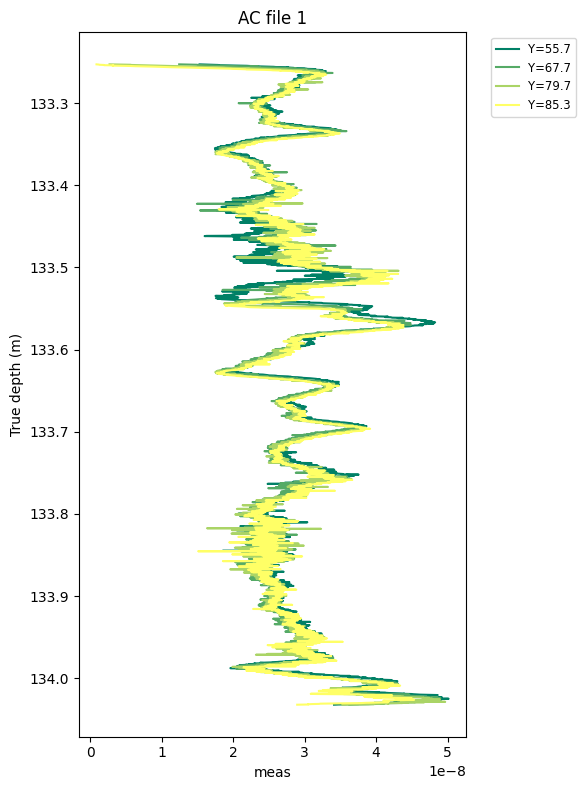

In [64]:
#plot first AC_file
df = pd.read_csv(AC_files[0])
df["meas"] = pd.to_numeric(df["meas"], errors="coerce") #change to number from string

y_values = sorted(df["Y_dimension(mm)"].unique()) ## pulls unique Y-dimenson values 

# Apply color map to y_values
cmap = matplotlib.colormaps.get_cmap("summer").resampled(len(y_values))
#make a figure
plt.figure(figsize=(6, 8))

for i, yv in enumerate(y_values):
    subset = df[df["Y_dimension(mm)"] == yv] #subset unique y-values
    plt.plot(subset["meas"], subset["True_depth(m)"], #plot meas vs depth
             color=cmap(i), label=f"Y={yv:.1f}")

plt.gca().invert_yaxis() # 0 depth up top
plt.xlabel("meas")
plt.ylabel("True depth (m)")
plt.title("AC file 1")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize="small")
plt.tight_layout()
plt.show()

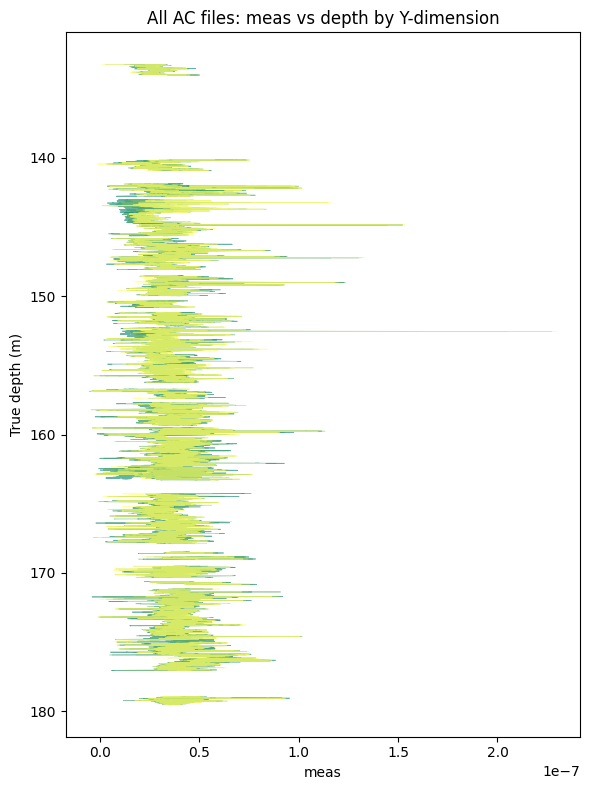

In [66]:
# now we're going to plot all the AC files on one graph
plt.figure(figsize=(6, 8))

for file in AC_files: #loops through all AC_files
    df = pd.read_csv(file)
    df["meas"] = pd.to_numeric(df["meas"], errors="coerce")

    y_values = sorted(df["Y_dimension(mm)"].unique())
    cmap = matplotlib.colormaps.get_cmap("summer").resampled(len(y_values))

    for i, yv in enumerate(y_values):
        subset = df[df["Y_dimension(mm)"] == yv]
        plt.plot(subset["meas"], subset["True_depth(m)"], 
                 color=cmap(i), alpha=0.6, lw = 0.5)  # alpha helps reduce overplotting

plt.gca().invert_yaxis()
plt.xlabel("meas")
plt.ylabel("True depth (m)")
plt.title("All AC files: meas vs depth by Y-dimension")
plt.tight_layout()
plt.show()

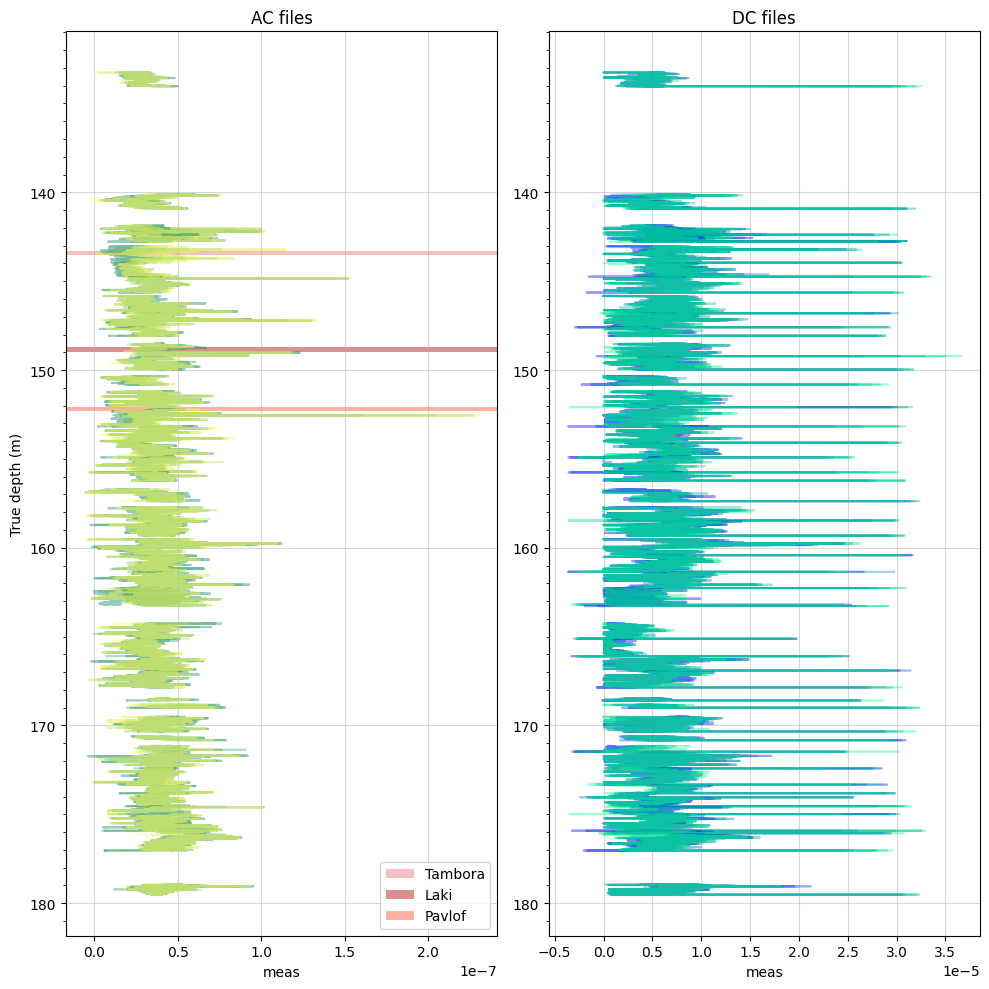

In [58]:
## now we plot AC and DC files

fig, axes = plt.subplots(1, 2, figsize=(10, 10), 
                         #sharey=True
                        )  # 1 row, 2 columns

##### AC FILES ##########
for file in AC_files:
    df = pd.read_csv(file)
    df["meas"] = pd.to_numeric(df["meas"], errors="coerce")

    y_values = sorted(df["Y_dimension(mm)"].unique())
    cmap = matplotlib.colormaps.get_cmap("summer").resampled(len(y_values))

    for i, yv in enumerate(y_values):
        subset = df[df["Y_dimension(mm)"] == yv]
        axes[0].plot(subset["meas"], subset["True_depth(m)"], alpha = 0.4,
                     color=cmap(i))
##add tephra 
axes[0].axhspan(143.3, 143.5, color="lightcoral", alpha=0.5, ec='none', zorder = 0, label = 'Tambora')
axes[0].axhspan(148.7, 149, color="firebrick", alpha=0.5, ec='none', zorder = 0, label = 'Laki')
axes[0].axhspan(152.1, 152.3, color="tomato", alpha=0.5, ec='none', zorder = 0, label = 'Pavlof')
axes[0].legend(loc = 'lower right')
###
axes[0].invert_yaxis()
axes[0].set_xlabel("meas")
axes[0].set_ylabel("True depth (m)")
axes[0].set_title("AC files")
axes[0].grid(alpha = 0.5, zorder = 0)

###### DC FILES #####
for file in DC_files:
    df = pd.read_csv(file)
    df["meas"] = pd.to_numeric(df["meas"], errors="coerce")

    y_values = sorted(df["Y_dimension(mm)"].unique())
    cmap = matplotlib.colormaps.get_cmap("winter").resampled(len(y_values))

    for i, yv in enumerate(y_values):
        subset = df[df["Y_dimension(mm)"] == yv]
        axes[1].plot(subset["meas"], subset["True_depth(m)"], alpha = 0.4, 
                     color=cmap(i), label=f"Y={yv:.1f}")
axes[1].invert_yaxis()
axes[1].set_xlabel("meas")
axes[1].set_title("DC files")
axes[1].grid(alpha = 0.5, zorder = 0)

axes[0].yaxis.set_minor_locator(ticker.MultipleLocator(1)) #add minor ticks
axes[1].yaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.tight_layout()
plt.savefig('big_rough_plot.png', dpi = 300, bbox_inches = 'tight')

# Liam code

In [5]:
#%% Read in metadata and import data

meta = pd.read_csv(path_to_data+metadata_file)

# import each script as an ECM class item
data = []
cores = []
sections = []
faces = []
ACorDCs = []
for index,row in meta.iterrows():
    
    core = row['core']
    section = row['section']
    face = row['face']
    ACorDC = row['ACorDC']
    
    if core == 'dic1':
        
        print("Reading "+core+", section "+str(section)+'-'+face+'-'+ACorDC)
    
        data_item = ECM(core,section,face,ACorDC,path_to_data)
        data_item.rem_ends(10)
        data_item.smooth(window)
        #data_item.norm_all()
        #data_item.norm_outside()
        data.append(data_item)
        
        cores.append(core)
        sections.append(section)
        faces.append(face)
        ACorDCs.append(ACorDC)

sec = set(sections)

Reading dic1, section 142-t-AC
Reading dic1, section 142-t-DC
Reading dic1, section 150-t-AC
Reading dic1, section 150-t-DC
Reading dic1, section 151-t-AC
Reading dic1, section 151-t-DC
Reading dic1, section 152-t-AC
Reading dic1, section 152-t-DC
Reading dic1, section 153-t-AC
Reading dic1, section 153-t-DC
Reading dic1, section 154-t-AC
Reading dic1, section 154-t-DC
Reading dic1, section 155-t-AC
Reading dic1, section 155-t-DC
Reading dic1, section 156-t-AC
Reading dic1, section 156-t-DC
Reading dic1, section 157-t-AC
Reading dic1, section 157-t-DC
Reading dic1, section 158-t-AC
Reading dic1, section 158-t-DC
Reading dic1, section 159-t-AC
Reading dic1, section 159-t-DC
Reading dic1, section 160-t-AC
Reading dic1, section 160-t-DC
Reading dic1, section 161-t-AC
Reading dic1, section 161-t-DC
Reading dic1, section 162-t-AC
Reading dic1, section 162-t-DC
Reading dic1, section 163-t-AC
Reading dic1, section 163-t-DC
Reading dic1, section 164-t-AC
Reading dic1, section 164-t-DC
Reading 